<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/HW6a_SurveyDataAnalysisGSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Analysis of General Social Survey Data

This is a public opinion data source that lends itself to all sorts of timely questions about a wide variety of topics. It is the leading public opinion data source in the US.


In [ ]:
# Code block 1a: Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt


In [ ]:
# Code block 1b: Installing some libraries we'll need
!pip install pyreadstat
!pip install researchpy

In [ ]:
# Code block 1c: Importing the new library
import researchpy as rp

You can download the data from https://gss.norc.org/us/en/gss/get-the-data.html and then copy the files to your Drive and read the data into your notebook.

I'll download the 2018 data -- the most recent survey year -- and read in the Stata file. Here's the codebook: http://www.gss.norc.org/get-documentation

I prefer to use the online data tool as an interactive codebook: https://gssdataexplorer.norc.org/variables/vfilter

We'll use the codebook to find some variables of interest and then do some basic analysis and visualization.

In [ ]:
# Code block 2: Reading in data
# The format of this data source is an SPSS data file, .sav, so we installed a library--pyreadstat--that extends pandas
# by adding another read method, read_spss. We use this to read the SPSS file into a new data object.
# I mounted my Drive in this notebook and read the file by copying the local path.
# need codebook to know what the column names mean
GSS2018_df = pd.read_stata('GSS2018.dta', convert_categoricals=False) #lose labels, keep #s - if you say cat=True - lose #s and keep labels

In [ ]:
GSS2018_df.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,prestg10,...,vpsu,wtssps,wtssnrps,fileversion,spwrkslf2,spwrkslffam,cowrkslf2,cowrkslffam,cowksup,subsamprate
0,2018,1,3.0,NaN,41.0,NaN,2.0,2.0,630.0,47.0,...,1,1.908104,2.244275,7222.4,NaN,NaN,NaN,NaN,NaN,0.5
1,2018,2,5.0,NaN,NaN,1.0,2.0,2.0,9640.0,22.0,...,1,0.914550,1.095217,7222.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,1.0,40.0,NaN,NaN,2.0,2.0,1106.0,61.0,...,1,0.609109,0.740432,7222.4,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,1.0,40.0,NaN,NaN,2.0,2.0,3320.0,59.0,...,1,0.642403,0.769342,7222.4,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,5,5.0,NaN,NaN,1.0,2.0,2.0,10.0,53.0,...,1,0.396347,0.462239,7222.4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Code block 3: Inspecting variables
# Let us examine the relationship between what people think of the money spent to improve the lives of Black people and whether respondents feel that social benefits makes people lazy

#Improving the conditions of Blacks (IAP, no answer, dk, skipped, (1) too little, (2) about right, (3) too much)
GSS2018_df['natrace']

,natrace
0,1.0
1,NaN
2,1.0
3,NaN
4,NaN
...,...
2343,1.0
2344,2.0
2345,NaN
2346,2.0


In [ ]:
# Handle missing values - if the value for natrace is < 1 OR > 3, then list as not a number
GSS2018_df['natracer'] = np.where((GSS2018_df['natrace'] < 1) | (GSS2018_df['natrace'] > 3), np.nan, GSS2018_df['natrace'])
GSS2018_df['natracer']

<ipython-input-11-5668d2634c6d>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GSS2018_df['natracer'] = np.where((GSS2018_df['natrace'] < 1) | (GSS2018_df['natrace'] > 3), np.nan, GSS2018_df['natrace'])


,natracer
0,1.0
1,NaN
2,1.0
3,NaN
4,NaN
...,...
2343,1.0
2344,2.0
2345,NaN
2346,2.0


In [ ]:
# Inspect variable on views of social benefits contributing to people's laziness

# The social benefits from the govt make people lazy
# IAP, no answer, dk, n/a, (1) Strongly agree (2) Agree (3) Neither agree/disagree (4) Disagree (5) Strongly disagree
GSS2018_df['govlazy']

,govlazy
0,NaN
1,2.0
2,NaN
3,4.0
4,2.0
...,...
2343,NaN
2344,NaN
2345,3.0
2346,NaN


In [ ]:
# Handle missing values - if value for govt benefits making people lazy is > 5, then list as not a number
GSS2018_df['govlazyr'] = np.where((GSS2018_df['govlazy'] < 1) | (GSS2018_df['govlazy'] > 7), np.nan, GSS2018_df['govlazy'])
GSS2018_df['govlazyr']

<ipython-input-13-736187923469>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GSS2018_df['govlazyr'] = np.where((GSS2018_df['govlazy'] < 1) | (GSS2018_df['govlazy'] > 7), np.nan, GSS2018_df['govlazy'])


,govlazyr
0,NaN
1,2.0
2,NaN
3,4.0
4,2.0
...,...
2343,NaN
2344,NaN
2345,3.0
2346,NaN


In [ ]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(GSS2018_df.govlazyr, GSS2018_df.natracer, prop='col', test='chi-square')
crosstab


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 8.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


natracer                        
natracer      1.0     2.0     3.0     All
govlazyr                                 
1.0          9.90   16.67   50.00   15.62
2.0         33.66   46.67   36.67   38.35
3.0         27.72   19.17    6.67   23.01
4.0         19.80   14.17    6.67   16.76
5.0          8.91    3.33    0.00    6.25
All        100.00  100.00  100.00  100.00

In [ ]:
print(sigtab)

                Chi-square test  results
0  Pearson Chi-square ( 8.0) =   45.7688
1                    p-value =    0.0000
2                 Cramer's V =    0.2550


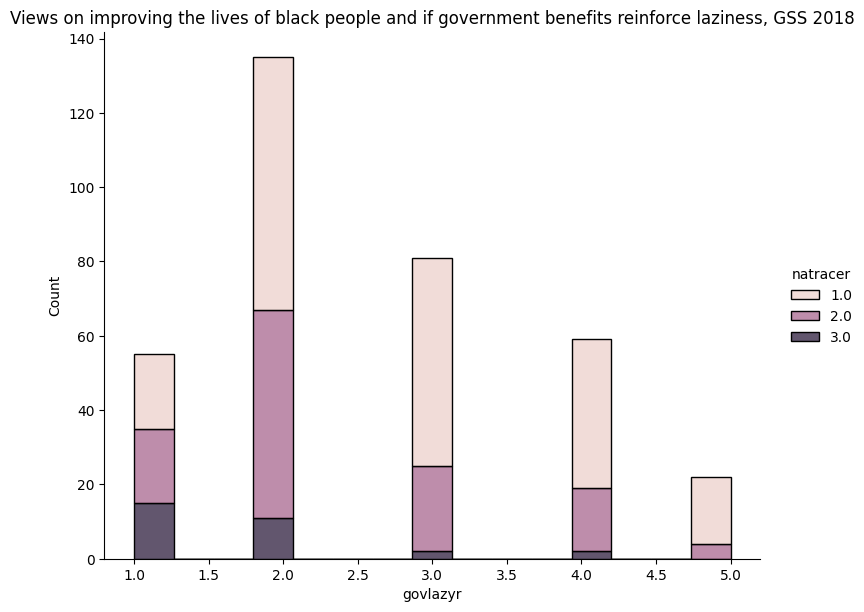

In [ ]:
p = sb.displot(GSS2018_df, x='govlazyr', hue='natracer', multiple="stack", height=6, aspect=1.25)
plt.title('Views on improving the lives of black people and if government benefits reinforce laziness, GSS 2018')
plt.show()

In [ ]:
GSS2018_df['marital'].value_counts()

,count
marital,
1.0,998
5.0,670
3.0,403
2.0,200
4.0,75


In [ ]:
GSS2018_df['marital'].isna().sum()

2

In [ ]:
# Code control variables
# If the #2 selected for sex variable = list as woman
GSS2018_df['women'] = np.where(GSS2018_df['sex'] == 2, 1, 0)

# If #2 selected for race variable = list as black
GSS2018_df['black'] = np.where(GSS2018_df['race'] == 2, 1, 0)

# If rincome16 > 26, then list as not a number
# Not seeing that in code book - codebook goes 1-12 & things higher than 12 are strings
GSS2018_df['rincomer'] = np.where(GSS2018_df['rincom16'] > 26, np.nan, GSS2018_df['rincom16'])

# if #1 selected for marital variable = list as married
GSS2018_df['married'] = np.where(GSS2018_df['marital'] == 1, 5, 3)

# If xnorcsiz > 7, then it is rural - 1-7 are for city
GSS2018_df['rural'] = np.where(GSS2018_df['xnorcsiz'] > 7, 1, 0)

<ipython-input-20-708352244465>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GSS2018_df['women'] = np.where(GSS2018_df['sex'] == 2, 1, 0)
<ipython-input-20-708352244465>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GSS2018_df['black'] = np.where(GSS2018_df['race'] == 2, 1, 0)
<ipython-input-20-708352244465>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

## **Use .value_counts() to check to make sure the binary variables were created**

In [ ]:
GSS2018_df['women'].value_counts()

,count
women,
1,1296
0,1052


In [ ]:
GSS2018_df['black'].value_counts()

,count
black,
0,1963
1,385


In [ ]:
GSS2018_df['rincomer'].value_counts()

,count
rincomer,
18.0,136
19.0,114
20.0,114
16.0,96
17.0,81
21.0,81
15.0,73
22.0,67
13.0,61


In [ ]:
GSS2018_df['married'].value_counts()

,count
married,
3,1350
5,998


In [ ]:
GSS2018_df['rural'].value_counts()

,count
rural,
0,2080
1,268


In [ ]:
GSS2018_df['govlazyr'].value_counts()

,count
govlazyr,
2.0,419
3.0,251
4.0,226
1.0,171
5.0,90


## Create linear model

In [ ]:
# This is the same model, with the recoded Dependent Variable, showing the same results.
# Linear model to belief that government social benefits making people lazy
Y = GSS2018_df['govlazyr'] # A higher score indicates higher belief in shiftlessness for those that receive government benefits
X = GSS2018_df[['women', 'black', 'rincomer', 'rural', 'married', 'natracer']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:               govlazyr   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     4.666
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           0.000181
Time:                        19:50:12   Log-Likelihood:                -312.57
No. Observations:                 210   AIC:                             639.1
Df Residuals:                     203   BIC:                             662.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2847      0.397      8.277      0.0

# **Summary**
- R-squared is 0.121 and adjusted value is 0.095, meaning that approximately 9.5% of the variance of the dependent variable can be explained by the model. This is a weak model.
- The F-statistic of 4.666 is statistically signficant at p < 0.05, meaning that at least one independent variable has significant effect on dependent variable. For this example, improving the lives of black people (natracer) is that variable

- None of the explanatory variables were statistically significant at p < 0.05, except for recoded natracer
- **For each unit increase in the improving the lives of black people, the belief that the government social benefits makes people lazy decreases by 0.536 units**.



---



---


## Activity (completed above)

1. Download a GSS data file from the NORC. Copy the file to your Drive and read it into a data object.
2. Identify a dependent variable to explain.
3. Create one analysis and visualization related to your DV.
4. Sketch out a data story, keeping in mind the principles of DF.